In [418]:
import numpy as np
def calculate_entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def database_entropy(x, y, labels):
    unique_labels = np.unique(labels)
    
    x_entropies = []
    y_entropies = []
    
    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        x_entropy = calculate_entropy(x[label_indices])
        y_entropy = calculate_entropy(y[label_indices])
        
        x_entropies.append(x_entropy)
        y_entropies.append(y_entropy)
    
    avg_x_entropy = np.mean(x_entropies)
    avg_y_entropy = np.mean(y_entropies)
    
    database_entropy = (avg_x_entropy + avg_y_entropy) / 2
    
    return database_entropy

讀取 Banana 資料

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data = pd.read_csv("banana  (with class label).csv")

In [431]:
X = Data['x'];
Y = Data['y'];
C = Data['class'];
C = C - 1;
data = np.array(list(zip(X, Y)))

Banana 原始訊號分類

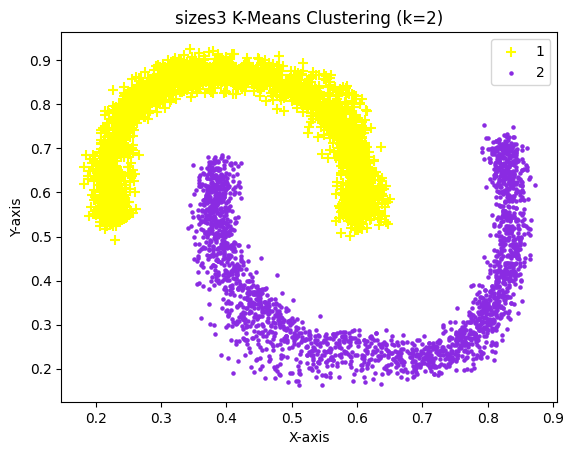

In [432]:
# 繪製原始資料點
plt.scatter(X[C == 0], Y[C == 0], c='yellow', marker='+', label='1', s=50)
plt.scatter(X[C == 1], Y[C == 1], c='blueviolet', marker='o', label='2', s=5)
# 加上標籤和標題
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'sizes3 K-Means Clustering (k=2)')
# 顯示圖表
plt.legend()
plt.show()

K-means 分類(Banana)

In [433]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

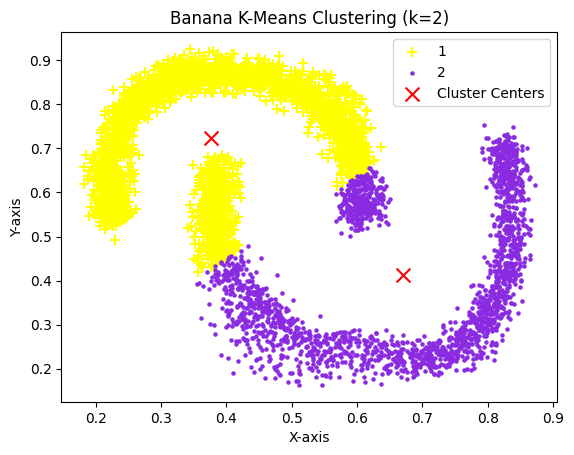

In [423]:
clusters = 2

# 使用 KMeans 進行聚類
start = time.time()
kmeans = KMeans(n_clusters=clusters,random_state=1)
kmeans.fit(data)
end = time.time()
# 獲取每個資料點所屬的簇
labels = kmeans.labels_
# 獲取聚類中心的座標
centers = kmeans.cluster_centers_


# 繪製原始資料點
plt.scatter(X[labels == 0], Y[labels == 0], c='yellow', marker='+', label='1', s=50)
plt.scatter(X[labels == 1], Y[labels == 1], c='blueviolet', marker='o', label='2', s=5)
# 繪製聚類中心
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
# 加上標籤和標題
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Banana K-Means Clustering (k={clusters})')
# 顯示圖表
plt.legend()
plt.show()

Banana 參數

In [424]:
print("執行時間：%f 秒" % (end - start))
accuracy = accuracy_score(C, labels)
print(f'Accuracy: {accuracy}')
sse = kmeans.inertia_
print(f'Sum of Squared Errors (SSE): {sse}')
entropy = database_entropy(X, Y, labels)
print(f"Entropy：{entropy}")

執行時間：0.080489 秒
Accuracy: 0.8285179796300145
Sum of Squared Errors (SSE): 185.20243898614174
Entropy：8.53458051052911


讀取 sizes3 資料

In [425]:
import pandas as pd
import numpy as np
Data = pd.read_csv("sizes3 (with class label).csv")

In [426]:
X = Data['x'];
Y = Data['y'];
C = Data['class'];
data = np.array(list(zip(X, Y)))

sizes3 原始訊號分類

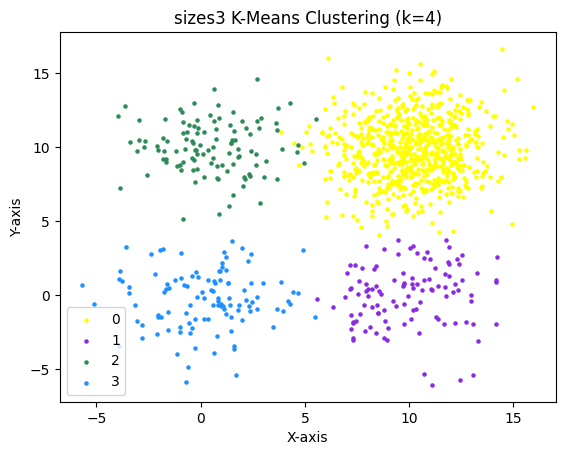

In [427]:
# 繪製原始資料點
plt.scatter(X[C == 0], Y[C == 0], c='yellow', marker='o', label='0', s=5)
plt.scatter(X[C == 1], Y[C == 1], c='blueviolet', marker='o', label='1', s=5)
plt.scatter(X[C == 2], Y[C == 2], c='seagreen', marker='o', label='2', s=5)
plt.scatter(X[C == 3], Y[C == 3], c='dodgerblue', marker='o', label='3', s=5)
# 加上標籤和標題
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'sizes3 K-Means Clustering (k=4)')
# 顯示圖表
plt.legend()
plt.show()

K-means 分類(sizes3)

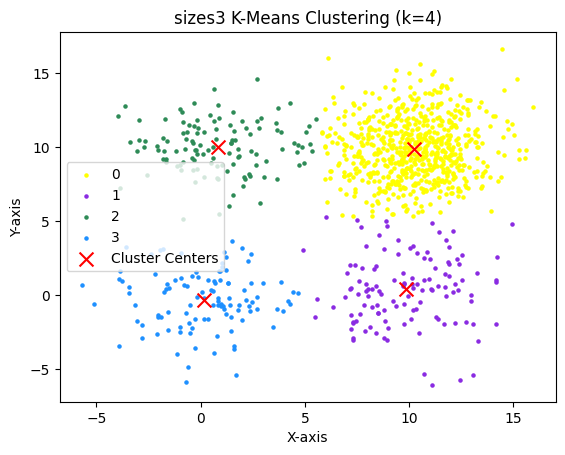

In [428]:
clusters = 4
from sklearn.cluster import KMeans
# 使用 KMeans 進行聚類
start = time.time()
kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(data)
end = time.time()

# 獲取每個資料點所屬的簇
labels = kmeans.labels_
# 獲取聚類中心的座標
centers = kmeans.cluster_centers_


labels = labels+50
labels[labels == 0 +50] = 1
labels[labels == 1 +50] = 2
labels[labels == 2 +50] = 3
labels[labels == 3 +50] = 0

# 繪製原始資料點
plt.scatter(X[labels == 0], Y[labels == 0], c='yellow', marker='o', label='0', s=5)
plt.scatter(X[labels == 1], Y[labels == 1], c='blueviolet', marker='o', label='1', s=5)
plt.scatter(X[labels == 2], Y[labels == 2], c='seagreen', marker='o', label='2', s=5)
plt.scatter(X[labels == 3], Y[labels == 3], c='dodgerblue', marker='o', label='3', s=5)

# 繪製聚類中心
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
# 加上標籤和標題
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'sizes3 K-Means Clustering (k={clusters})')
plt.legend()
plt.show()

In [429]:
print("執行時間：%f 秒" % (end - start))
accuracy = accuracy_score(C, labels)
print(f'Accuracy: {accuracy}')
sse = kmeans.inertia_
print(f'Sum of Squared Errors (SSE): {sse}')
entropy = database_entropy(X, Y, labels)
print(f"Entropy：{entropy}")

執行時間：0.043508 秒
Accuracy: 0.98
Sum of Squared Errors (SSE): 8341.253299448485
Entropy：7.484026558995024
